# Product Recomendation System 
A Project thet can help the Businesses by increasing their Customer retention and experiance during their visit on their 
online business website.


# by  ~  Prince Kumar 

#   

# Part - I
Popularity Based System

In [1]:
# First of all Import all Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.decomposition import TruncatedSVD


In [4]:
d1 = pd.read_csv("ratings_Beauty.csv")
d1.dropna()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [12]:
d2= d1.groupby('ProductId')['Rating'].count()
d2=pd.DataFrame(d2)
pop_pds = d2.sort_values('Rating',ascending=False)


<AxesSubplot:xlabel='ProductId'>

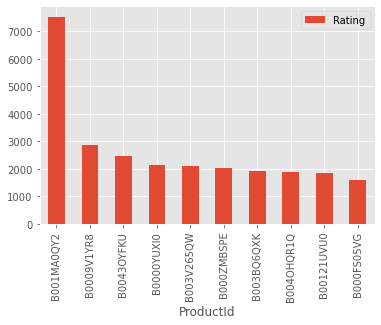

In [14]:
plt.style.use("ggplot")
pop_pds.head(10).plot(kind= "bar")

# Top 10 Most Rated/Popular Products

#  

# Part - II
Model Based Collabrative Filtering System :

It Recomends the Products to that Customer on the Basis of his Purchase history/ 
Or on the basis of Smilarity of Ratings provided by other users.

In [24]:
# Subset of Amazon Ratings

d12 = d1.head(10000)  # Take a Mini dataset So that better INdexing & Minimizing the errors

In [36]:
d24= d12.pivot_table(values="Rating", columns="ProductId", index="UserId", fill_value=0)
d24
# Cretaing a Table Product vs User on basis of Ratings provided by them

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X=d24.T
X

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000052YPU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Do Dimension Reduction to reduce no. of Users & Better Quality Data Analysis
# Use Truncated SVD 
dm = TruncatedSVD(n_components=10)  # Object Initiation & Declaration
dmx = dm.fit_transform(X)
dmx = pd.DataFrame(dmx)
dmx  # Now this is our Decomposed Matrix

,0,1,2,3,4,5,6,7,8,9
0,3.259801e-15,5.437309e-15,-1.950410e-13,-1.768351e-14,1.595994e-13,-9.274360e-13,-3.467832e-13,6.100984e-14,-1.672951e-12,-8.931536e-12
1,3.801838e-15,9.090369e-14,1.330867e-13,-5.222401e-13,-9.813467e-14,1.628104e-12,-7.563893e-12,-3.326237e-12,-1.194688e-12,-1.654675e-12
2,5.381937e-16,-2.664501e-15,-8.505327e-15,1.585227e-15,-5.758836e-15,-5.476679e-14,-2.580309e-15,-1.163204e-13,1.672077e-13,-1.792062e-13
3,-1.784549e-23,2.428674e-22,2.192029e-22,-1.874023e-22,1.678268e-22,-6.921289e-22,5.799131e-22,6.512722e-22,-2.308061e-21,-5.997504e-21
4,-6.766712e-15,4.682341e-14,3.658826e-14,-1.991008e-14,4.334721e-14,2.235022e-13,2.568390e-13,8.624536e-13,-2.530938e-12,2.142637e-12
...,...,...,...,...,...,...,...,...,...,...
881,1.559704e-13,-1.693717e-12,-3.644013e-12,-4.665436e-12,2.709216e-12,-2.756898e-12,-3.081984e-11,2.532296e-11,-1.437234e-10,-4.209768e-11
882,6.034328e-08,1.721605e-06,3.891294e-06,5.002011e-06,2.623791e-06,2.679337e-05,1.372396e-05,4.106352e-06,9.128049e-06,1.577986e-04
883,3.976816e-06,2.279476e-01,-1.041779e-02,-9.497007e-06,-4.233577e-05,-9.652432e-04,-9.535470e-05,-3.843109e-03,9.226204e-05,-4.924585e-02
884,3.726021e-07,8.236597e-04,-3.014868e-06,-1.495093e-05,-3.116586e-07,1.553724e-04,3.114762e-03,2.974019e-05,-3.432339e-04,7.207230e-04


In [41]:
# Using the Decomposed Matrix to Create A Pearson's Correlation Matrix
cmt = np.corrcoef(dmx)
cmx=pd.DataFrame(cmt)
cmx

,0,1,2,3,4,5,6,7,8,9,...,876,877,878,879,880,881,882,883,884,885
0,1.000000,0.043792,0.501780,0.965530,-0.486060,-0.963990,0.379652,0.964057,-0.963918,0.857443,...,0.564260,0.314803,-0.181699,0.693952,-0.928398,0.333671,-0.985109,0.335746,-0.070306,-0.535868
1,0.043792,1.000000,0.077582,-0.085671,-0.137178,0.055583,0.362745,0.187455,0.055279,-0.026848,...,-0.248036,0.316701,0.590201,0.034154,0.015245,0.124043,-0.059855,0.180096,-0.796230,-0.413668
2,0.501780,0.077582,1.000000,0.302670,-0.973657,-0.681950,0.880658,0.473478,-0.682332,0.855792,...,0.893478,0.696477,-0.630809,0.937504,-0.747088,-0.608654,-0.622583,0.197067,-0.146684,-0.378879
3,0.965530,-0.085671,0.302670,1.000000,-0.269724,-0.894188,0.151507,0.913653,-0.893977,0.737838,...,0.425640,0.097546,-0.101968,0.516702,-0.826902,0.505675,-0.916623,0.335266,0.091578,-0.395729
4,-0.486060,-0.137178,-0.973657,-0.269724,1.000000,0.664886,-0.906645,-0.476773,0.665295,-0.824654,...,-0.864544,-0.837477,0.642417,-0.952260,0.755791,0.635113,0.614587,-0.148944,0.275588,0.469343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0.333671,0.124043,-0.608654,0.505675,0.635113,-0.084835,-0.561035,0.354637,-0.084413,-0.174756,...,-0.502742,-0.560267,0.683662,-0.427113,0.032349,1.000000,-0.188523,0.152345,0.028708,-0.074782
882,-0.985109,-0.059855,-0.622583,-0.916623,0.614587,0.982362,-0.520932,-0.965689,0.982385,-0.909363,...,-0.679971,-0.437717,0.267741,-0.801402,0.969860,-0.188523,1.000000,-0.338309,0.133844,0.601425
883,0.335746,0.180096,0.197067,0.335266,-0.148944,-0.288940,0.263195,0.386480,-0.289033,0.279906,...,0.171770,0.085963,0.182634,0.238074,-0.283852,0.152345,-0.338309,1.000000,0.114618,-0.070818
884,-0.070306,-0.796230,-0.146684,0.091578,0.275588,0.007049,-0.524280,-0.269517,0.007443,-0.000663,...,-0.008961,-0.552399,-0.357560,-0.218751,0.100667,0.028708,0.133844,0.114618,1.000000,0.753555


# Nice ! Now we have to Target 1 Product

Get the Index of this product ID : B000052YQ0


In [48]:
i= "B000052YQ0"
p_id = (list(X.index)).index(i)
p_id

884

In [54]:
# Now you Just have to Create a Correlation Matrix for this Item with all items
# ON the basis of Correlation Matrix values Similarity will be Defined 
sm = cmt[p_id]
smx = pd.DataFrame(sm)
smx

,0
0,-0.070306
1,-0.796230
2,-0.146684
3,0.091578
4,0.275588
...,...
881,0.028708
882,0.133844
883,0.114618
884,1.000000


# Great !
Now u JUst hv to Recomend the Top 7 Products to that user 

In [58]:
rex = list ( X.index[sm > 0.90] )

rex.remove(i)

rex[0:7]

['B000050B6X',
 'B000052WYD',
 'B000052Y33',
 'B000052YJF',
 'B000052YKI',
 'B000052YKM',
 'B000052YLX']

# Wonderful ! These are Top7 Recommended Products by my engine